In [1]:
from __future__ import print_function
__author__= 'Casyfill'  ## based on Federika Bianko's assignment notebook


import numpy as np
import pandas as pd

from scipy.optimize import curve_fit, minimize

import pylab as pl
import json
import urllib

s = json.load( urllib.urlopen('https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json') )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## 1. Choose which distributions to use 

In [2]:
distributions = ['gaus', 'tdistr', 'beta', 'pois', 'chisq', 'binom']

- gaus   | [numpy.random.normal(loc=0.0, scale=1.0, size=None)](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html#numpy.random.normal)  | [wiki](https://en.wikipedia.org/wiki/Normal_distribution)

- beta | [numpy.random.beta(a, b, size=None)¶](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.beta.html#numpy.random.beta) | [wiki](https://en.wikipedia.org/wiki/Beta_distribution)

- pois | [numpy.random.poisson(lam=1.0, size=None)](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.poisson.html#numpy.random.poisson) | [wiki](https://en.wikipedia.org/wiki/Poisson_distribution)

- chisq | [numpy.random.chisquare(df, size=None)](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare) | [wiki](https://en.wikipedia.org/wiki/Chi-squared_distribution)

- binom | [numpy.random.binomial(n, p, size=None)](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html#numpy.random.binomial)| [wiki](https://en.wikipedia.org/wiki/Binomial_distribution)

- student's | [standard_t(df, size=None)](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.standard_t.html#numpy.random.standard_t) | [wiki](https://en.wikipedia.org/wiki/Student%27s_t-distribution)

## 2. Create increasing sequence of numbers (size of the samples)

In [3]:
def translate1D(np_array, leftMin, leftMax, rightMin, rightMax):
    '''translates ND array onto specific range'''

    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin
    return rightMin + rightSpan*(np_array - leftMin)/leftSpan


In [4]:
sampleSizes = np.around(translate1D(np.logspace(0,3, num=100, endpoint=True),1,1000,10,2000), decimals=0 ).astype(int)

## 3. Define distribution parameters

In [16]:
MyMEAN=100
MySD = 5

a = b = p = .5
n = MyMEAN/p

## 4. Make a dictionary to host the distributions.


In [9]:
#actually dont neeed that, but nice to copypaste keys to the next cell
md = {k:[] for k in distributions}
print(md)

{'pois': [], 'gaus': [], 'beta': [], 'chisq': [], 'tdistr': [], 'binom': []}


## 5. Populating a dictionary with distributions.

In [10]:
#lognorm
md['tdistr'] = [np.random.standard_t(25, size=S) + MyMEAN for S in np.nditer(sampleSizes)]
#chisquare
md['chisq'] = [np.random.chisquare(MyMEAN, size=S) for S in np.nditer(sampleSizes)]
#pois
md['pois'] = [np.random.poisson(lam=MyMEAN, size=None) for S in np.nditer(sampleSizes)]
#gaus
md['gaus'] = [np.random.normal(loc=MyMEAN, scale=MySD, size=S) for S in np.nditer(sampleSizes)]
#beta
md['beta'] = [np.random.beta(a, b, size=S) + MyMEAN for S in np.nditer(sampleSizes)]
#binom
md['binom'] = [np.random.binomial(n, p, size=S) for S in np.nditer(sampleSizes)]



## 6. Plot medians vs Sample size

Now lets get SD and Mean for each sample of each distribution and collect them all together into a new dictionary

In [17]:
statDicts = []

for key, samples in md.iteritems():
    for i, sample in enumerate(samples):
        statDicts.append({'type':key,
                          'sampleSize':sampleSizes[i],
                          'std':np.std(sample), 
                          'Mean':np.mean(sample),
                          
                          })


df = pd.DataFrame(statDicts)
df.head()

,Mean,sampleSize,std,type
0,121,10,0,pois
1,107,10,0,pois
2,84,10,0,pois
3,90,10,0,pois
4,101,11,0,pois


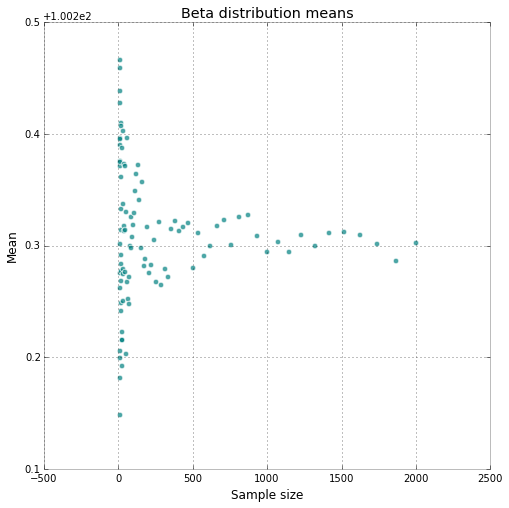

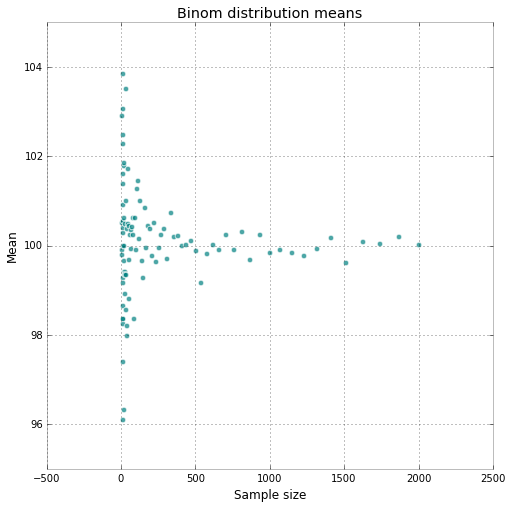

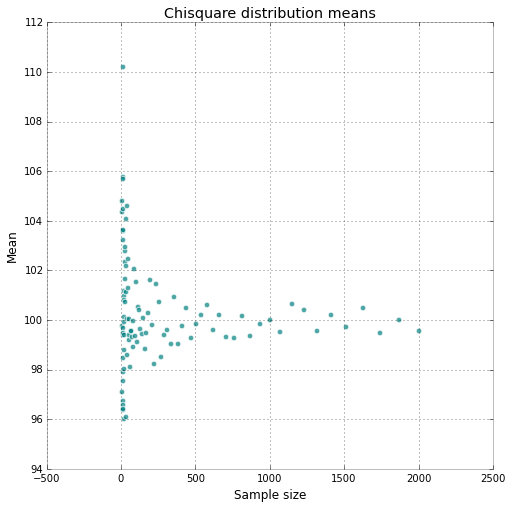

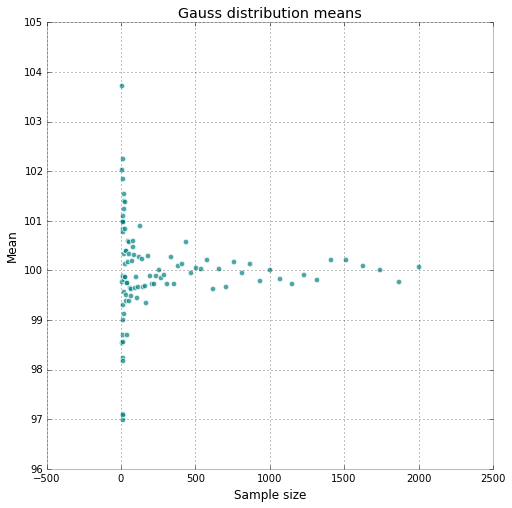

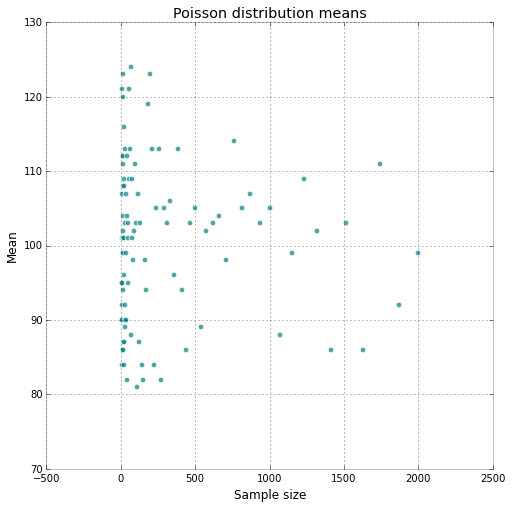

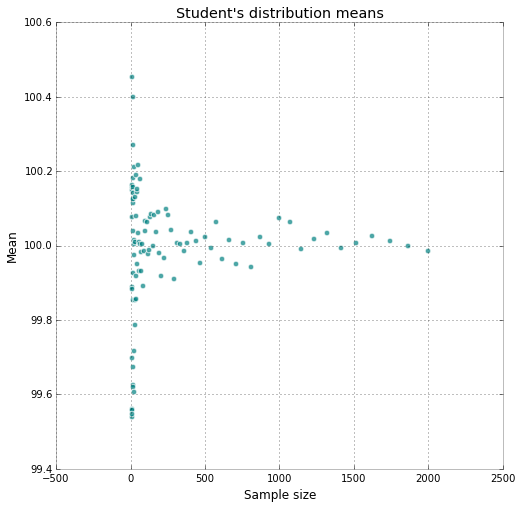

In [18]:
groups = df.groupby('type')
titles = {'lognorm': 'Lognorm', 
          'chisq': 'Chisquare', 
          'pois': 'Poisson', 
          'gaus': 'Gauss', 
          'beta': 'Beta', 
          'cauchy': 'Cauchy', 
          'binom': 'Binom', 
          'pareto': 'Pareto',
          'tdistr': "Student's"}

for name, group in groups:
    Title = '%s distribution means' % titles[name]
    ax = group.plot(kind='scatter', 
                               x='sampleSize', 
                               y='Mean', 
                               title = Title, 
                               s=30, 
                               c='teal',
                               alpha = 0.7,
                               figsize=(8, 8)
                               );
    ax.set_xlabel('Sample size');

## 7. Now let's plot overal standart distribution of all samples

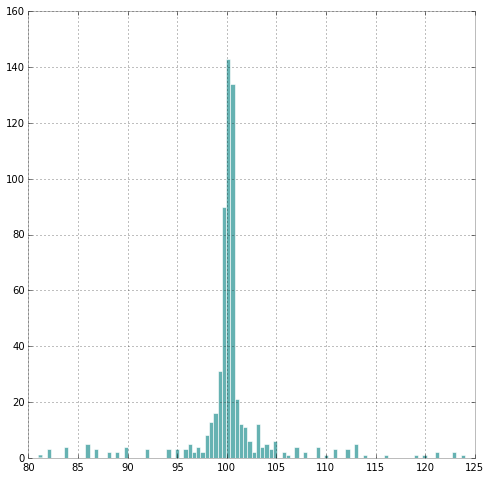

In [15]:
df.Mean.hist(bins=100, figsize=(8, 8), color='teal', alpha=.6);